## Welcome to our notebook with visualisations for Privacy Enhancing Techniques.
In this notebook we will try to explain to you what privacy enhancy techniques are and what effect they have on the __performance__ and __energy cost__ of a machine learning algorithm. We will do so by showing you different visualisations that contain data of a previously executed research. The goal of this notebook is to explain the effect of PET in the clearest way possible with these visualisations, and to gauge the effectiveness of the created visualisations by answering some questions

To give a short introduction on **Privacy Enhancing Techniques**: Privacy-enhancing techniques (PETs) are methods and tools that are designed to protect the privacy of sensitive information while still allowing it to be used for analysis or processing. They are commonly used in situations where there is a need to work with data that contains *personally identifiable information* (PII), such as medical records, financial transactions, or user behavior data. The main goal of PET's is to protect sensitive data while still allowing it to be used for useful purposes such as research, analysis, or business operations.


This notebook will start by giving you some visualisations on the effect that PET's have on energy cost. The data that will be used in this notebook originates from research where 2 privacy enhancing techniques have been tested: <br>
 - **Synthetic data** <br>
 - **K-anonimity** <br>
    
    
The 'enhanced' data has than been applied onto three different machine learning algorithms:<br>
- [*K-nearest neighbors*](#Algorithms-explained) <br>
- [*Neural Network*](#Algorithms-explained) <br> 
- [*Logistic regression*](#Algorithms-explained) 

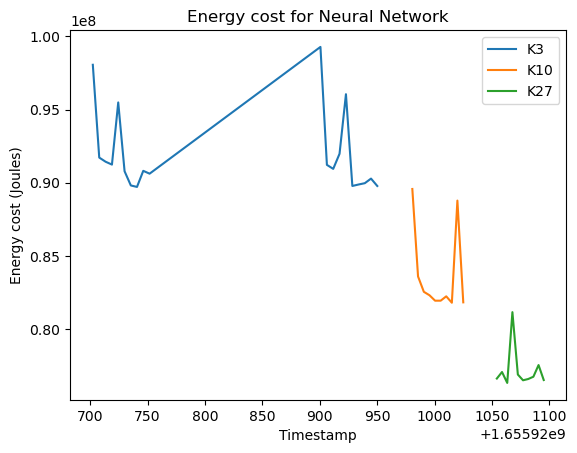

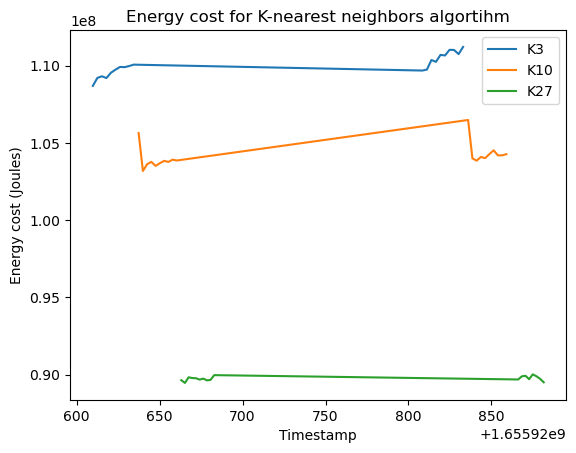

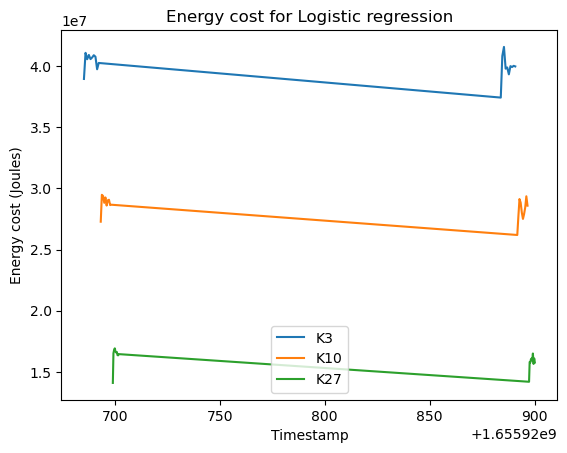

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the data
k_ann_energy_nn = pd.read_csv('Anonymisation\Energy\Energy_nn.csv')
k_ann_energy_knn = pd.read_csv('Anonymisation\Energy\Energy_knn.csv')
k_ann_energy_logreg = pd.read_csv('Anonymisation\Energy\Energy_logreg.csv')

#load the idle energy data
idle_energy = pd.read_csv('Anonymisation\Energy\Energy_idle.csv')

#load datasets for the different values of k and algorithms
k_ann_energy_nn_k3_adult = k_ann_energy_nn.loc[k_ann_energy_nn['label'] == 'Adult_3']
k_ann_energy_nn_k10_adult = k_ann_energy_nn.loc[k_ann_energy_nn['label'] == 'Adult_10']
k_ann_energy_nn_k27_adult = k_ann_energy_nn.loc[k_ann_energy_nn['label'] == 'Adult_27']

k_ann_energy_knn_k3_adult = k_ann_energy_knn.loc[k_ann_energy_knn['label'] == 'Adult_3']
k_ann_energy_knn_k10_adult = k_ann_energy_knn.loc[k_ann_energy_knn['label'] == 'Adult_10']
k_ann_energy_knn_k27_adult = k_ann_energy_knn.loc[k_ann_energy_knn['label'] == 'Adult_27']

k_ann_energy_logreg_k3_adult = k_ann_energy_logreg.loc[k_ann_energy_logreg['label'] == 'Adult_3']
k_ann_energy_logreg_k10_adult = k_ann_energy_logreg.loc[k_ann_energy_logreg['label'] == 'Adult_10']
k_ann_energy_logreg_k27_adult = k_ann_energy_logreg.loc[k_ann_energy_logreg['label'] == 'Adult_27']

#load the syntetic datasets for the different algorithms
syn_energy_nn = pd.read_csv('Synthetic_data\Energy\Energy_nn.csv')
syn_energy_knn = pd.read_csv('Synthetic_data\Energy\Energy_nn.csv')
syn_energy_logreg = pd.read_csv('Synthetic_data\Energy\Energy_nn.csv')

# Initialise the subplot function using number of rows and columns
# figure, axis = plt.subplots(2, 2)
# axis[0, 0].set_title('Energy cost for Neural Network')
# axis[0, 1].set_title('Energy cost for K-nearest neighbors algortihm')
# axis[1, 0].set_title('Energy cost for Logistic regression')


# Line plot of energy cost over time on neural network
plt.plot(k_ann_energy_nn_k3_adult['timestamp'], k_ann_energy_nn_k3_adult['pkg'] + k_ann_energy_nn_k3_adult['dram'], label='K3')
plt.plot(k_ann_energy_nn_k10_adult['timestamp'], k_ann_energy_nn_k10_adult['pkg'] + k_ann_energy_nn_k10_adult['dram'], label='K10')
plt.plot(k_ann_energy_nn_k27_adult['timestamp'], k_ann_energy_nn_k27_adult['pkg'] + k_ann_energy_nn_k27_adult['dram'], label='K27')
# plt.plot(idle_energy['timestamp'], idle_energy['pkg'] + idle_energy['dram'], label='idle')
# plt.plot(syn_energy_nn['timestamp'], syn_energy_nn['pkg'] + syn_energy_nn['dram'], label='Syn')
# axis[0, 0].plot(k_ann_energy_nn_k3_adult['timestamp'], k_ann_energy_nn_k3_adult['pkg'] + k_ann_energy_nn_k3_adult['dram'], label='K3')
# axis[0, 0].plot(k_ann_energy_nn_k10_adult['timestamp'], k_ann_energy_nn_k10_adult['pkg'] + k_ann_energy_nn_k10_adult['dram'], label='K10')
# axis[0, 0].plot(k_ann_energy_nn_k27_adult['timestamp'], k_ann_energy_nn_k27_adult['pkg'] + k_ann_energy_nn_k27_adult['dram'], label='K27')

plt.plot()
plt.xlabel('Timestamp')
plt.ylabel('Energy cost (Joules)')
plt.legend()
plt.title(('Energy cost for Neural Network'))
plt.show()

# Line plot of energy cost over time on k nearest neigbhors
plt.plot(k_ann_energy_knn_k3_adult['timestamp'], k_ann_energy_knn_k3_adult['pkg'] + k_ann_energy_knn_k3_adult['dram'], label='K3')
plt.plot(k_ann_energy_knn_k10_adult['timestamp'], k_ann_energy_knn_k10_adult['pkg'] + k_ann_energy_knn_k10_adult['dram'], label='K10')
plt.plot(k_ann_energy_knn_k27_adult['timestamp'], k_ann_energy_knn_k27_adult['pkg'] + k_ann_energy_knn_k27_adult['dram'], label='K27')
# plt.plot(syn_energy_nn['timestamp'], syn_energy_knn['pkg'] + syn_energy_knn['dram'], label='Syn')
# axis[0, 1].plot(k_ann_energy_knn_k3_adult['timestamp'], k_ann_energy_knn_k3_adult['pkg'] + k_ann_energy_knn_k3_adult['dram'], label='K3')
# axis[0, 1].plot(k_ann_energy_knn_k10_adult['timestamp'], k_ann_energy_knn_k10_adult['pkg'] + k_ann_energy_knn_k10_adult['dram'], label='K10')
# axis[0, 1].plot(k_ann_energy_knn_k27_adult['timestamp'], k_ann_energy_knn_k27_adult['pkg'] + k_ann_energy_knn_k27_adult['dram'], label='K27')

plt.plot()
plt.xlabel('Timestamp')
plt.ylabel('Energy cost (Joules)')
plt.legend()
plt.title(('Energy cost for K-nearest neighbors algortihm'))
plt.show()


# Line plot of energy cost over time of logistic regresseion
plt.plot(k_ann_energy_logreg_k3_adult['timestamp'], k_ann_energy_logreg_k3_adult['pkg'] + k_ann_energy_logreg_k3_adult['dram'], label='K3')
plt.plot(k_ann_energy_logreg_k10_adult['timestamp'], k_ann_energy_logreg_k10_adult['pkg'] + k_ann_energy_logreg_k10_adult['dram'], label='K10')
plt.plot(k_ann_energy_logreg_k27_adult['timestamp'], k_ann_energy_logreg_k27_adult['pkg'] + k_ann_energy_logreg_k27_adult['dram'], label='K27')
# plt.plot(syn_energy_logreg['timestamp'], syn_energy_logreg['pkg'] + syn_energy_logreg['dram'], label='Syn')
# axis[1, 0].plot(k_ann_energy_logreg_k3_adult['timestamp'], k_ann_energy_logreg_k3_adult['pkg'] + k_ann_energy_logreg_k3_adult['dram'], label='K3')
# axis[1, 0].plot(k_ann_energy_logreg_k10_adult['timestamp'], k_ann_energy_logreg_k10_adult['pkg'] + k_ann_energy_logreg_k10_adult['dram'], label='K10')
# axis[1, 0].plot(k_ann_energy_logreg_k27_adult['timestamp'], k_ann_energy_logreg_k27_adult['pkg'] + k_ann_energy_logreg_k27_adult['dram'], label='K27')

plt.plot()
plt.xlabel('Timestamp')
plt.ylabel('Energy cost (Joules)')
plt.title('Energy cost for Logistic regression')
plt.legend()
plt.show()




In **Figure 1** above we have dranwn line plots of energy cost over time for the three different machine learning algorithms (neural network, k-nearest neighbors, and logistic regression). The x-axis represents the time while the y-axis represents the total energy cost (measured in Joules). This graph give us an insight into which algorithm consumes more energy and how the energy cost varies over time. With a lien for each of the tested privacy enhancing techniques, 1 line for the synthetic data and three lines for the 3 different values of k in K-annonymisation (3,10,27). 


In [48]:
# # Stacked bar chart of energy cost by algorithm and type
# energy_costs.plot(kind='bar', stacked=True)
# plt.ylabel('Energy cost (Joules)')
# plt.title('Figure 2')
# plt.show()


The stacked barchart above shows the 

##### Stacked bartchart maken van de verschillende algoritmes met de energy waardes. Zonder duratie als x as. Barchart ook in de grafiek krijgen van de energywaardes zonder toegpaste PET om als baseline met de andere bars te kunnen vegelijken.

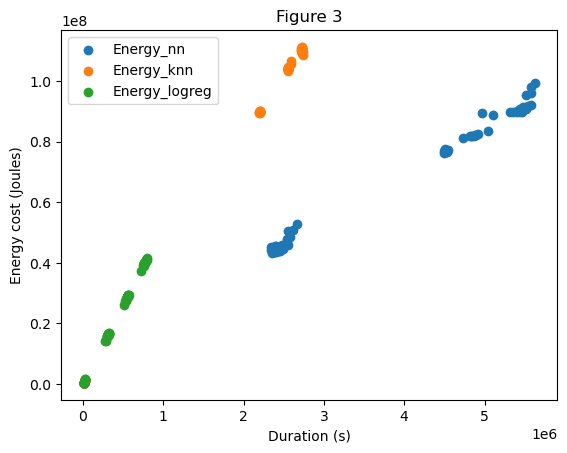

In [11]:
# Scatter plot of energy cost vs. duration
plt.scatter(energy_nn['duration'], energy_nn['pkg'] + energy_nn['dram'], label='Energy_nn')
plt.scatter(energy_knn['duration'], energy_knn['pkg'] + energy_knn['dram'], label='Energy_knn')
plt.scatter(energy_logreg['duration'], energy_logreg['pkg'] + energy_logreg['dram'], label='Energy_logreg')
plt.title('Figure 3')
plt.xlabel('Duration (s)')
plt.ylabel('Energy cost (Joules)')
plt.legend()
plt.show()

**Figure 3** is a scatter plot of energy cost vs. duration: This graph shows a scatter plot of the energy cost of the algorithms against their duration (time taken to execute). The x-axis represents the duration (measured in seconds), and the y-axis represents the energy cost (measured in Joules). This graph can provide insights into the relationship between the energy cost and duration of different algorithms. 

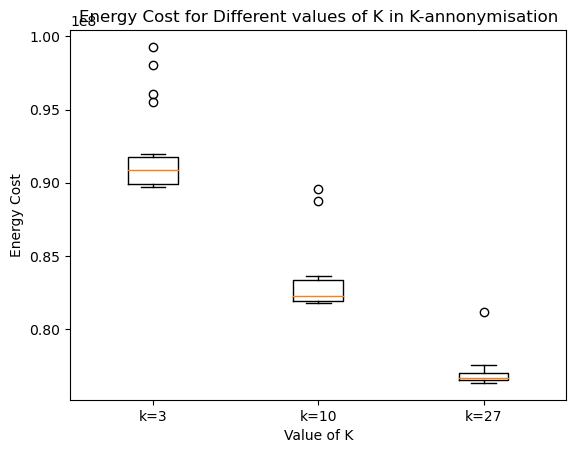

In [12]:
# Load the data from the CSV file
data = pd.read_csv(r'C:\Users\Jonne\Desktop\Skriiptie\Privacy-Enhancing-ML-main\Anonymisation\Energy\Energy_nn.csv')

# Extract the energy cost values for each privacy-enhancing technique

k3 = data[data['label'] == 'Adult_3']['pkg'] + data[data['label'] == 'Adult_3']['dram']
k10 = data[data['label'] == 'Adult_10']['pkg'] + data[data['label'] == 'Adult_10']['dram']
k27 = data[data['label'] == 'Adult_27']['pkg'] + data[data['label'] == 'Adult_27']['dram']

# Create a list of energy cost values for each technique
energy_costs = [k3, k10, k27]

# Create a list of labels for the x-axis
labels = ['k=3', 'k=10', 'k=27']

# Generate the box plot
plt.boxplot(energy_costs, labels=labels)

# Set the title and axis labels
plt.title('Energy Cost for Different values of K in K-annonymisation')
plt.xlabel('Value of K')
plt.ylabel('Energy Cost')

# Display the plot
plt.show()

The boxplot above (**figure 4**) shows the average energy use of the three different values for k-anonimity. 

# Evaluation of the visualisations

Now that you have read through this notebook and hopefully have gained more knowledge about the subject of Privacy enhancing techniques, we would like to see how well you have understood our visualisations. Please follow the link below and answer the questions there. During the survey you are allowed to go back and forth towards the notebook to check back upon the visualisations and text. 



Questions on energy usage
- Based on figure 1, which k value resulted in the lowest energy cost for the neural network algorithm?
- Looking at the graphs, which algorithm resulted in the highest energy cost for k=10?
- According to the the graphs, which k value resulted in the lowest energy cost for the logistic regression algorithm?
- How does the energy cost of the k nearest neighbors algorithm compare to the other two algorithms at k=27?
- Which privacy enhancement technique resulted in the lowest energy cost on average across all three machine learning algorithms?
- How does the energy cost of the neural network algorithm change as k increases?
- How does the energy cost of the logistic regression algorithm compare to the other two algorithms at k=10?


Questions on accuracy loss





General questions
- If you wanted to predict values using a machine learning algorithm and wanted the emission to be as low as possible, what algorithm and privacy enhancing technique could you choose best? 
- What algorithm seems to be best in terms of both accuraty and costing the least amount of energy?


<!-- - Based on the stacked bar chart, which algorithm had the lowest energy cost on average across all values of k? -->

# Algorithms explained



**Logistic regression** is a statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to one of two possible classes. For example, a logistic regression model tries to predict whether a tumor can be malignent or benign. It does this by looking at available data of both tumor types and tries to find a pattern in this data to predict new tumor cases.

The key idea behind logistic regression is to model the relationship between the input variables (also called features or independent variables) and the binary output variable (also called the dependent variable or target) using a logistic function. The algorithm does this by linking a weight to the different variables of the dataset. To give an example, when an algortihm tries to predict what type a tumor is it might give a higher weight to things like cel production rate. Since a higher value of this variable would mean a higher chance of a tumor being malignant. Other variables might be less important and receive a lower weight. When weight for all variables are culculated the algorithm can try to predict values by filling in the variable values and multiplying them by these created weights. The value will lie between 1-0 and will lie closest to one of the two. 

In logistic regression, the input features are combined linearly using weights (coefficients), similar to linear regression. However, instead of directly predicting a continuous output like in linear regression, logistic regression applies the logistic function to the linear combination of features and predicts the probability of the instance belonging to the positive class.

Logistic regression is widely used in various fields, including **healthcare, finance, marketing, and social sciences**, where binary classification problems are prevalent and interpretability is valuable.




